In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Cargar una imagen en modo BGR
img = cv2.imread('img_objectos.jpeg')

In [2]:
img.shape

(1600, 1200, 3)

In [3]:
img

array([[[ 19,  25,  32],
        [ 20,  26,  33],
        [ 20,  26,  33],
        ...,
        [ 48,  54,  53],
        [ 40,  46,  45],
        [ 33,  39,  38]],

       [[ 19,  25,  32],
        [ 20,  26,  33],
        [ 20,  26,  33],
        ...,
        [ 43,  49,  48],
        [ 37,  43,  42],
        [ 32,  38,  37]],

       [[ 19,  25,  32],
        [ 20,  26,  33],
        [ 20,  26,  33],
        ...,
        [ 32,  38,  37],
        [ 28,  34,  33],
        [ 27,  33,  32]],

       ...,

       [[ 37, 103,  78],
        [ 39, 106,  79],
        [ 43, 109,  84],
        ...,
        [  0, 138, 167],
        [  0, 138, 167],
        [  0, 138, 167]],

       [[ 44,  95,  75],
        [ 42,  94,  71],
        [ 40,  91,  71],
        ...,
        [  0, 138, 167],
        [  0, 138, 167],
        [  0, 138, 167]],

       [[ 42,  87,  68],
        [ 39,  84,  65],
        [ 37,  79,  61],
        ...,
        [  0, 138, 167],
        [  0, 138, 167],
        [  0, 138, 167]]

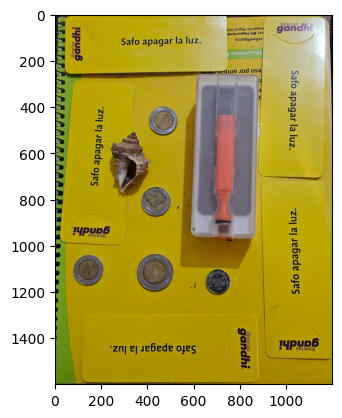

In [4]:
# Convertir BGR a RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar la imagen usando matplotlib
plt.imshow(img_rgb)

In [5]:
# Separar los canales de color
B, G, R = cv2.split(img)
R

array([[ 32,  33,  33, ...,  53,  45,  38],
       [ 32,  33,  33, ...,  48,  42,  37],
       [ 32,  33,  33, ...,  37,  33,  32],
       ...,
       [ 78,  79,  84, ..., 167, 167, 167],
       [ 75,  71,  71, ..., 167, 167, 167],
       [ 68,  65,  61, ..., 167, 167, 167]], dtype=uint8)

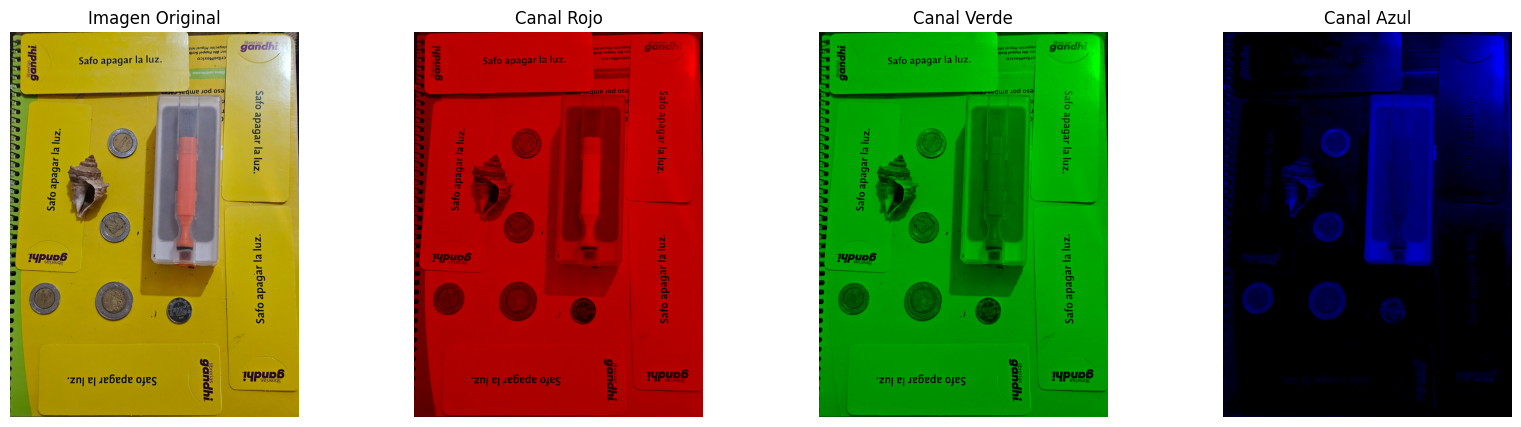

In [6]:
# Crear una imagen en negro con el mismo tamaño
zeros = np.zeros(img.shape[:2], dtype="uint8")

# Crear imágenes para cada canal de color
img_red = cv2.merge([R, zeros, zeros])
img_green = cv2.merge([zeros, G, zeros])
img_blue = cv2.merge([zeros, zeros, B])

# Visualizar los canales individuales y la imagen original
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Convertir BGR a RGB para matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Imagen original
axes[0].imshow(img_rgb)
axes[0].set_title('Imagen Original')
axes[0].axis('off')

# Canal Rojo
axes[1].imshow(img_red)
axes[1].set_title('Canal Rojo')
axes[1].axis('off')

# Canal Verde
axes[2].imshow(img_green)
axes[2].set_title('Canal Verde')
axes[2].axis('off')

# Canal Azul
axes[3].imshow(img_blue)
axes[3].set_title('Canal Azul')
axes[3].axis('off')

plt.show()

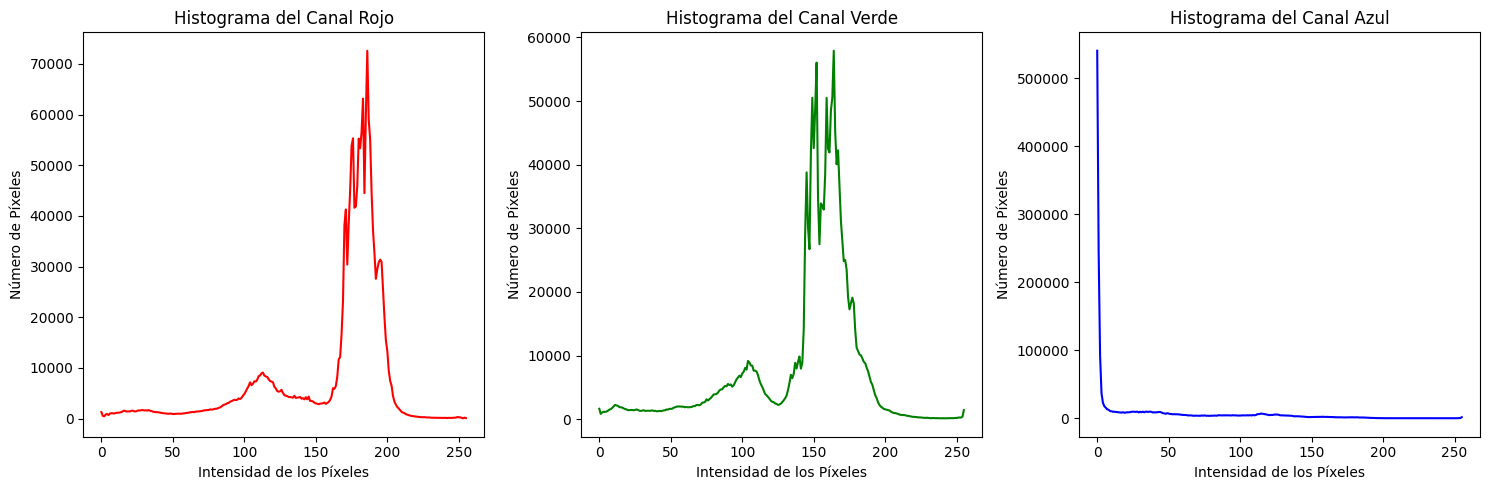

In [7]:
# Calcular el histograma para cada canal
hist_B = cv2.calcHist([B], [0], None, [256], [0, 256])
hist_G = cv2.calcHist([G], [0], None, [256], [0, 256])
hist_R = cv2.calcHist([R], [0], None, [256], [0, 256])

# Visualizar los histogramas
plt.figure(figsize=(15, 5))

plt.subplot(133)
plt.plot(hist_B, color='blue')
plt.title('Histograma del Canal Azul')
plt.xlabel('Intensidad de los Píxeles')
plt.ylabel('Número de Píxeles')

plt.subplot(132)
plt.plot(hist_G, color='green')
plt.title('Histograma del Canal Verde')
plt.xlabel('Intensidad de los Píxeles')
plt.ylabel('Número de Píxeles')

plt.subplot(131)
plt.plot(hist_R, color='red')
plt.title('Histograma del Canal Rojo')
plt.xlabel('Intensidad de los Píxeles')
plt.ylabel('Número de Píxeles')

plt.tight_layout()
plt.show()

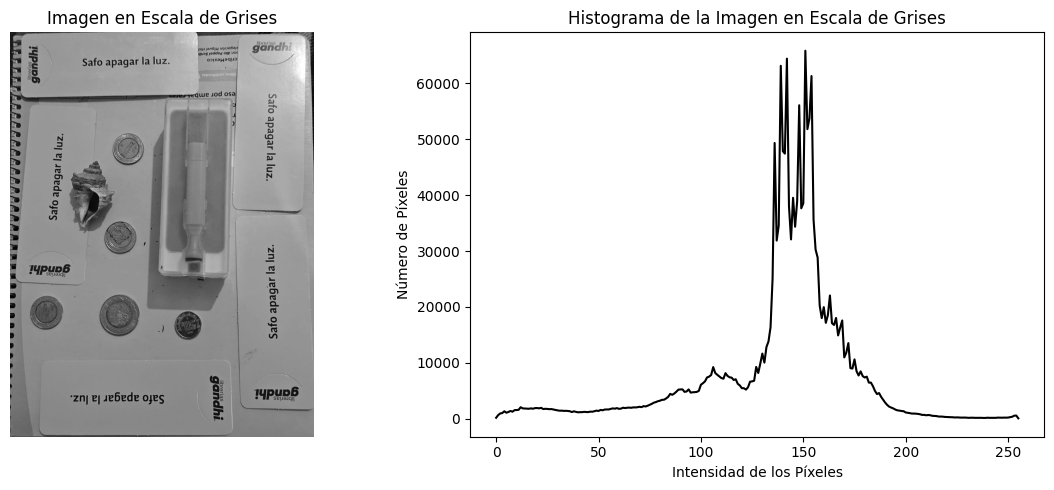

In [8]:
# Convertir la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Calcular el histograma para la imagen en escala de grises
hist_gray = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Visualizar la imagen en escala de grises y su histograma
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('Imagen en Escala de Grises')
plt.axis('off')

plt.subplot(122)
plt.plot(hist_gray, color='black')
plt.title('Histograma de la Imagen en Escala de Grises')
plt.xlabel('Intensidad de los Píxeles')
plt.ylabel('Número de Píxeles')

plt.tight_layout()
plt.show()

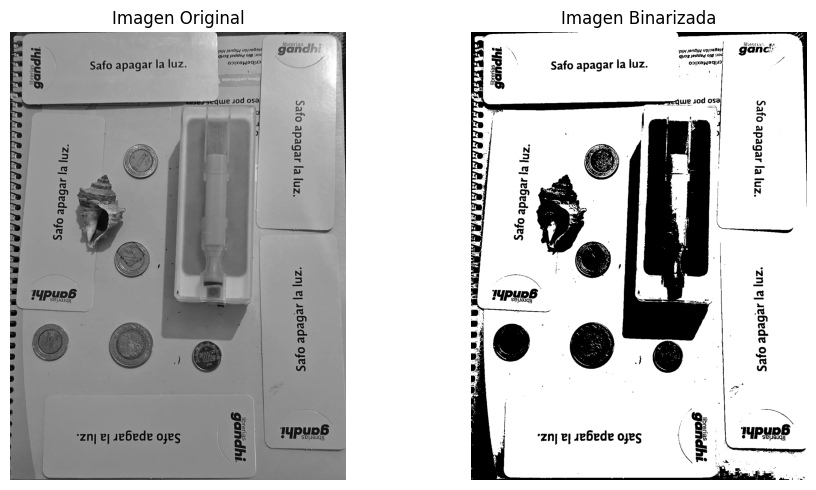

In [9]:
# Aplicar la binarización con un umbral específico
_, binary_img = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Mostrar la imagen original y la imagen binarizada
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(binary_img, cmap='gray')
plt.title('Imagen Binarizada')
plt.axis('off')

plt.tight_layout()
plt.show()

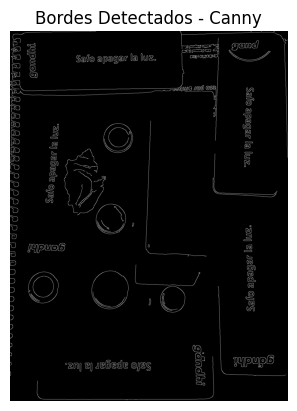

In [10]:
# Detectar bordes usando el detector de Canny
blurred = cv2.GaussianBlur(gray, (9, 9), 2)
edges = cv2.Canny(blurred, 30, 150)

plt.imshow(edges, cmap='gray')
plt.title('Bordes Detectados - Canny')
plt.axis('off')
plt.show()

In [11]:
# Para detectar circulos funciona mejor en escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Se convierte la imagen a gris / gray

In [12]:
# Se especifican las caracteristicas del circulo (moneda)
monedas = cv2.HoughCircles(
    blurred, # Filtro creado en el paso anterior
    cv2.HOUGH_GRADIENT, #es de OpenCV. Requiere de los parametros siguientes:
    dp=1, # Resolucion de la imagen (1 es por defecto)
    minDist=50, # Distancia minima entre los centros de los circulos
    param1=100, # Umbral superior para el detector de bordes internos (Canny)
    param2=50, # Umbral para la deteccion de circulos (Entre mas bajo puede tener mas falsos positivos)
    minRadius=10, #Rango de radios de los circulos detectados 
    maxRadius=100
)

In [13]:
if monedas is not None:
    monedas = np.uint16(np.around(monedas))
    for i in monedas[0, :]:
        # Dibujar el círculo exterior
        cv2.circle(img, (i[0], i[1]), i[2], (0, 0, 255), 4) # Color del circulo rojo
        # Dibujar el centro del círculo
        cv2.circle(img, (i[0], i[1]), 2, (0, 255, 0), 3) # Color del centro del circulo, verde

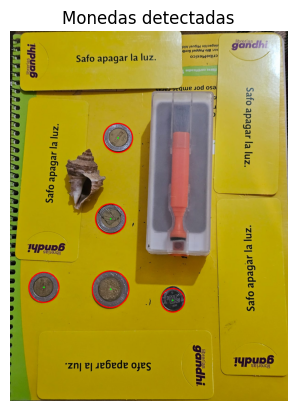

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Monedas detectadas')
plt.axis('off')
plt.show()